# Exercises

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
import env
from wordcloud import WordCloud
from acquire import get_blog_articles, get_news_article
from prepare import create_clean, create_lemmatize, create_stemmed, lemmatize

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    get_connection will determine the database we are wanting to access, and load the database along with env stored values like username, password, and host
    to create the url needed for SQL to read the correct database.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
url = get_connection('spam_db')
query = "SELECT * FROM spam"
df = pd.read_sql(query, url, index_col='id')

## Spam Data
### Load the spam data set.

In [4]:
# first look at data
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [5]:
def clean_text(text, extra_stopwords=['r', 'u', 'c']):
    '''
    This function takes in text and optional additional stopwords
    then it stems the text, removes stopwords, and removes special characters
    Returning a block of cleaned text
    '''
    #create the stemmer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    #remove special characters
    clean_text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    
    #remove special characters using regex
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    #return the cleaned block of text
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [23]:
ham_words = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam_words = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_words = ham_words + spam_words

In [24]:
ham_words[0:5]

['go', 'jurong', 'point', 'crazy', 'available']

In [25]:
spam_words[0:5]

['free', 'entry', '2', 'wkly', 'comp']

In [94]:
all_words[0:5]

['go', 'jurong', 'point', 'crazy', 'available']

In [ ]:
ham_bigrams = list(nltk.ngrams(ham_words,2))
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2)).value_counts().head(20))

spam_bigrams = list(nltk.ngrams(spam_words,2))
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2)).value_counts().head(20))

all_bigrams = list(nltk.ngrams(all_words,2))
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2)).value_counts().head(20))

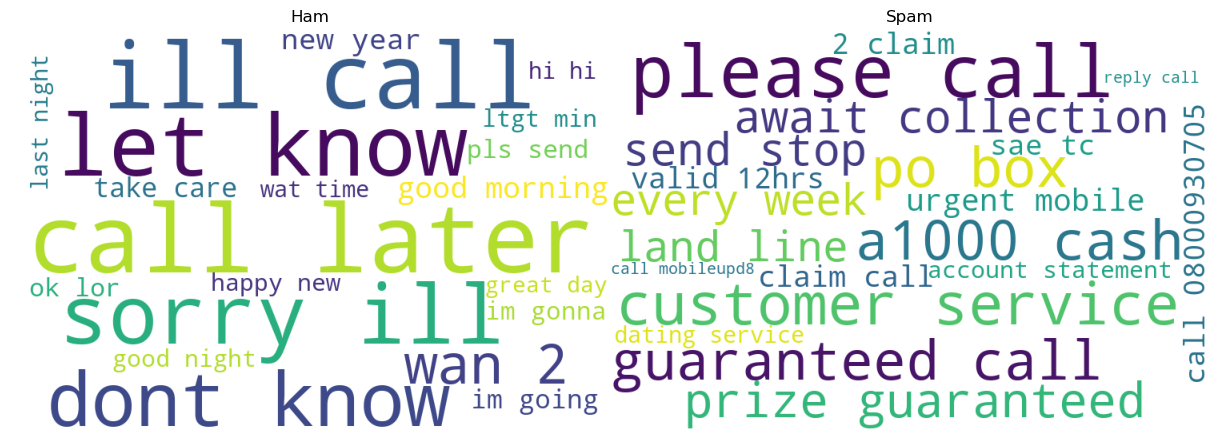

In [119]:
ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
ham_img = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(ham_data)

spam_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_img = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(spam_data)

plt.figure(figsize=(12, 8))
axs = [plt.axes([0, 0, .75, .5]), plt.axes([.5, 0, .75, .5])]

axs[0].imshow(ham_img)
axs[1].imshow(spam_img)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

### Is there any overlap in the bigrams for the spam data and the ham data?

In [124]:
top_20_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(ltgt, min)        19
(wat, time)        18
(hi, hi)           18
(last, night)      18
(great, day)       17
Name: count, dtype: int64

In [125]:
top_20_spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(send, stop)            19
(await, collection)     19
(every, week)           19
(land, line)            18
(urgent, mobile)        18
(valid, 12hrs)          17
(2, claim)              17
(claim, call)           17
(call, 08000930705)     16
(sae, tc)               16
(account, statement)    16
(dating, service)       15
(call, mobileupd8)      15
(reply, call)           15
Name: count, dtype: int64

#### no immediate bigrams appear to overlap

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [129]:
ham_trigrams = list(nltk.ngrams(ham_words,3))
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))

spam_trigrams = list(nltk.ngrams(spam_words,3))
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))

all_trigrams = list(nltk.ngrams(all_words,3))
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3)).value_counts().head(20))

all_cloud = WordCloud(background_color='white', height=500, width=750).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=500, width=750).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=500, width=750).generate(' '.join(spam_words))

In [130]:
ham_trigrams

[('go', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'bugis'),
 ('available', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'got'),
 ('cine', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'oni'),
 ('wif', 'oni', 'dun'),
 ('oni', 'dun', 'say'),
 ('dun', 'say', 'early'),
 ('say', 'early', 'hor'),
 ('early', 'hor', 'already'),
 ('hor', 'already', 'say'),
 ('already', 'say', 'nah'),
 ('say', 'nah', 'dont'),
 ('nah', 'dont', 'think'),
 ('dont', 'think', 'go'),
 ('think', 'go', 'usf'),
 ('go', 'usf', 'life'),
 ('usf', 'life', 'around'),
 ('life', 'around', 'though'),
 ('around', 'though', 'even'),
 ('though', 'even', 'brother'),
 ('even', 'brother', 'like'),
 ('brother', 'lik

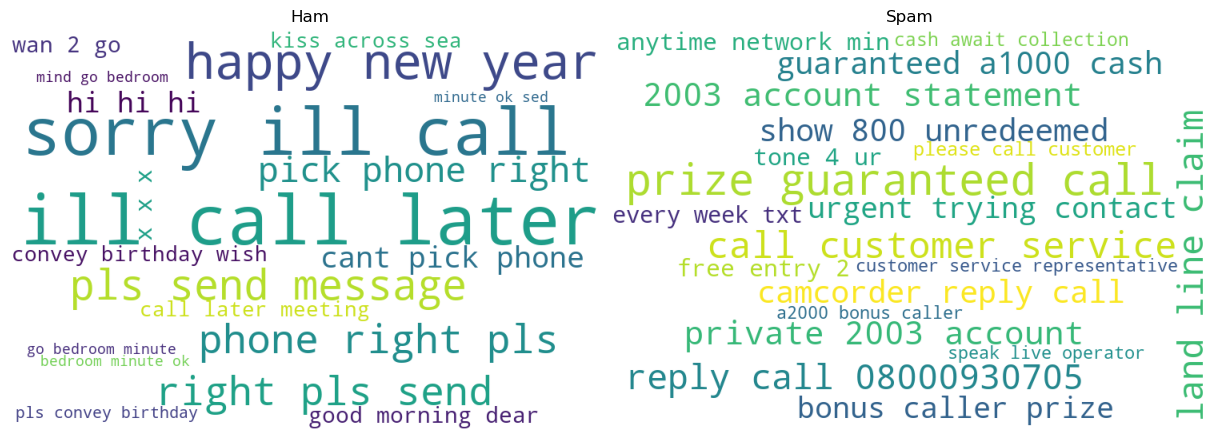

In [132]:
ham_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}
ham_img = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(ham_data)

spam_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
spam_img = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(spam_data)

plt.figure(figsize=(12, 8))
axs = [plt.axes([0, 0, .75, .5]), plt.axes([.5, 0, .75, .5])]

axs[0].imshow(ham_img)
axs[1].imshow(spam_img)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')
plt.show()

## Explore the blog articles using the techniques discussed in the exploration lesson.

In [134]:
codeup_df = get_blog_articles()
codeup_df

,title,article
0,Spotlight on APIDA Voices: Celebrating Heritag...,May is traditionally known as Asian American a...
1,Women in tech: Panelist Spotlight – Magdalena ...,Women in tech: Panelist Spotlight – Magdalena ...
2,Women in tech: Panelist Spotlight – Rachel Rob...,Women in tech: Panelist Spotlight – Rachel Rob...
3,Women in Tech: Panelist Spotlight – Sarah Mellor,Women in tech: Panelist Spotlight – Sarah Mell...
4,Women in Tech: Panelist Spotlight – Madeleine ...,Women in tech: Panelist Spotlight – Madeleine ...
5,Black Excellence in Tech: Panelist Spotlight –...,Black excellence in tech: Panelist Spotlight –...


In [144]:
codeup_words = clean_text(' '.join(codeup_df['article']), extra_stopwords = ['women', 'codeup'])

In [215]:
codeup_words[]

['may',
 'traditionally',
 'known',
 'asian',
 'american',
 'pacific',
 'islander',
 'aapi',
 'heritage',
 'month',
 'month',
 'celebrate',
 'history',
 'contribution',
 'made',
 'possible',
 'aapi',
 'friend',
 'family',
 'community',
 'also',
 'examine',
 'level',
 'support',
 'seek',
 'opportunity',
 'better',
 'understand',
 'aapi',
 'community',
 'effort',
 'address',
 'real',
 'concern',
 'experience',
 'sat',
 'arbeena',
 'thapa',
 'one',
 'codeups',
 'financial',
 'aid',
 'enrollment',
 'manager',
 'arbeena',
 'identifies',
 'nepali',
 'american',
 'desi',
 'arbeenas',
 'parent',
 'immigrated',
 'texas',
 '1988',
 'better',
 'employment',
 'educational',
 'opportunity',
 'arbeenas',
 'older',
 'sister',
 'five',
 'made',
 'move',
 'u',
 'arbeena',
 'born',
 'later',
 'becoming',
 'first',
 'family',
 'u',
 'citizen',
 'take',
 'effort',
 'inclusivity',
 'seriously',
 'speaking',
 'arbeena',
 'taught',
 'term',
 'aapi',
 'excludes',
 'desiamerican',
 'individual',
 'hence',
 'us

In [146]:
codeup_counts = pd.Series(codeup_words).value_counts()
codeup_counts

data        17
tech        15
science     14
asian       12
panelist    11
            ..
equality     1
ensure       1
older        1
lasting      1
22nd         1
Name: count, Length: 583, dtype: int64

In [149]:
codeup_bigrams = list(nltk.ngrams(codeup_words,2))
top_20_codeup_bigrams = (pd.Series(nltk.ngrams(codeup_words, 2)).value_counts().head(20))

codeup_trigrams = list(nltk.ngrams(codeup_words,3))
top_20_codeup_trigrams = (pd.Series(nltk.ngrams(codeup_words, 3)).value_counts().head(20))

codeup_data_2 = {k[0] + ' ' + k[1]: v for k, v in top_20_codeup_bigrams.to_dict().items()}
codeup_img_2 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(codeup_data_2)

codeup_data_3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_codeup_trigrams.to_dict().items()}
codeup_img_3 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(codeup_data_3)

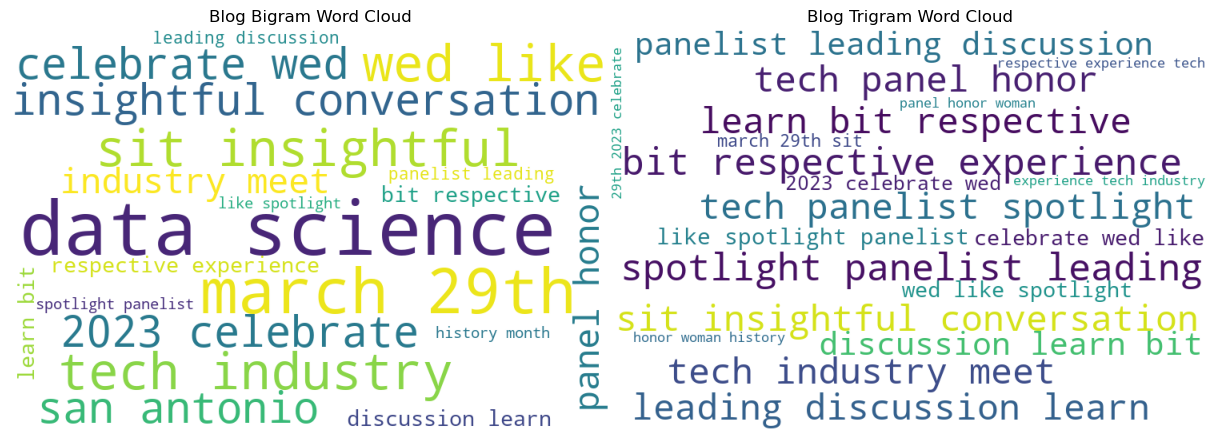

In [150]:
plt.figure(figsize=(12, 8))
axs = [plt.axes([0, 0, .75, .5]), plt.axes([.5, 0, .75, .5])]

axs[0].imshow(codeup_img_2)
axs[1].imshow(codeup_img_3)

axs[0].set_title('Blog Bigram Word Cloud')
axs[1].set_title('Blog Trigram Word Cloud')

for ax in axs: ax.axis('off')
plt.show()

In [151]:
top_20_codeup_bigrams

(data, science)               12
(march, 29th)                  8
(tech, industry)               5
(wed, like)                    5
(sit, insightful)              5
(insightful, conversation)     5
(san, antonio)                 5
(2023, celebrate)              5
(celebrate, wed)               5
(industry, meet)               5
(panel, honor)                 5
(respective, experience)       5
(bit, respective)              5
(learn, bit)                   5
(discussion, learn)            5
(leading, discussion)          5
(panelist, leading)            5
(spotlight, panelist)          5
(history, month)               5
(like, spotlight)              5
Name: count, dtype: int64

In [152]:
top_20_codeup_trigrams

(bit, respective, experience)      5
(spotlight, panelist, leading)     5
(sit, insightful, conversation)    5
(tech, panelist, spotlight)        5
(tech, panel, honor)               5
(tech, industry, meet)             5
(learn, bit, respective)           5
(leading, discussion, learn)       5
(panelist, leading, discussion)    5
(discussion, learn, bit)           5
(like, spotlight, panelist)        5
(wed, like, spotlight)             5
(celebrate, wed, like)             5
(2023, celebrate, wed)             5
(march, 29th, sit)                 4
(respective, experience, tech)     4
(experience, tech, industry)       4
(honor, woman, history)            4
(panel, honor, woman)              4
(29th, 2023, celebrate)            4
Name: count, dtype: int64

## Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [135]:
news_df = get_news_article()
news_df

,title,body,category
0,HSBC blocks employees from texting on their wo...,HSBC Holdings is blocking employees from texti...,business
1,Jet Airways Founder Naresh Goyal allowed home ...,A special PMLA court in Mumbai has allowed Jet...,business
2,"Wipro's staff count falls for 4th quarter, att...",Wipro reported a fall in its employee headcoun...,business
3,"Wipro's revenue in Q2 falls to ₹22,516 cr, pro...",IT major Wipro reported a 0.1% fall in its rev...,business
4,"Will march them off to Tihar, they'll know SC'...",Chief Justice of India (CJI) DY Chandrachud re...,business
5,Goldman Sachs CEO David Solomon quits working ...,"David Solomon, the 61-year-old CEO of investme...",business
6,Rajnigandha-parent to buy Noida's GIP Mall for...,"DS Group, known for brands like Rajnigandha an...",business
7,India to respond to concerns on laptop import ...,India will respond to concerns raised by some ...,business
8,Amazon to become rival Microsoft's customer in...,Microsoft is preparing to make its rival Amazo...,business
9,DA hiked by 4% for central govt employees,The Union Cabinet has approved a proposal to r...,business


In [154]:
news_df.category.value_counts()

category
business         10
entertainment    10
technology       10
sports           10
Name: count, dtype: int64

In [167]:
business_words = clean_text(' '.join(news_df[news_df['category'] == 'business']['body']), extra_stopwords = ['2023'])
business_counts = pd.Series(business_words).value_counts()

entertainment_words = clean_text(' '.join(news_df[news_df['category'] == 'entertainment']['body']), extra_stopwords = ['2023'])
entertainment_counts = pd.Series(entertainment_words).value_counts()

technology_words = clean_text(' '.join(news_df[news_df['category'] == 'technology']['body']), extra_stopwords = ['2023'])
technology_counts = pd.Series(technology_words).value_counts()

sports_words = clean_text(' '.join(news_df[news_df['category'] == 'sports']['body']), extra_stopwords = ['2023'])
sports_counts = pd.Series(sports_words).value_counts()

In [168]:
business_counts.head(10)

crore         7
employee      7
reported      6
said          5
dearness      4
government    4
phone         3
allowance     3
amazon        3
court         3
Name: count, dtype: int64

In [169]:
entertainment_counts.head(10)

said          8
actor         6
deol          4
also          4
film          3
government    3
life          3
would         3
leto          3
added         3
Name: count, dtype: int64

In [170]:
technology_counts.head(10)

said        6
new         6
reported    5
revenue     4
employee    4
crore       4
chip        4
1           3
tuesday     3
million     3
Name: count, dtype: int64

In [171]:
sports_counts.head(10)

cup        12
world      12
odi         8
match       5
added       5
new         5
zealand     5
said        5
india       5
run         5
Name: count, dtype: int64

In [173]:
#business
business_bigrams = list(nltk.ngrams(business_words,2))
top_20_business_bigrams = (pd.Series(nltk.ngrams(business_words, 2)).value_counts().head(20))

business_trigrams = list(nltk.ngrams(business_words,3))
top_20_business_trigrams = (pd.Series(nltk.ngrams(business_words, 3)).value_counts().head(20))

business_data_2 = {k[0] + ' ' + k[1]: v for k, v in top_20_business_bigrams.to_dict().items()}
business_img_2 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(business_data_2)

business_data_3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_business_trigrams.to_dict().items()}
business_img_3 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(business_data_3)

In [174]:
#entertainment
entertainment_bigrams = list(nltk.ngrams(entertainment_words,2))
top_20_entertainment_bigrams = (pd.Series(nltk.ngrams(entertainment_words, 2)).value_counts().head(20))

entertainment_trigrams = list(nltk.ngrams(entertainment_words,3))
top_20_entertainment_trigrams = (pd.Series(nltk.ngrams(entertainment_words, 3)).value_counts().head(20))

entertainment_data_2 = {k[0] + ' ' + k[1]: v for k, v in top_20_entertainment_bigrams.to_dict().items()}
entertainment_img_2 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(entertainment_data_2)

entertainment_data_3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_entertainment_trigrams.to_dict().items()}
entertainment_img_3 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(entertainment_data_3)

In [175]:
#technology
technology_bigrams = list(nltk.ngrams(technology_words,2))
top_20_technology_bigrams = (pd.Series(nltk.ngrams(technology_words, 2)).value_counts().head(20))

technology_trigrams = list(nltk.ngrams(technology_words,3))
top_20_technology_trigrams = (pd.Series(nltk.ngrams(technology_words, 3)).value_counts().head(20))

technology_data_2 = {k[0] + ' ' + k[1]: v for k, v in top_20_technology_bigrams.to_dict().items()}
technology_img_2 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(technology_data_2)

technology_data_3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_technology_trigrams.to_dict().items()}
technology_img_3 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(technology_data_3)

In [176]:
#sports
sports_bigrams = list(nltk.ngrams(sports_words,2))
top_20_sports_bigrams = (pd.Series(nltk.ngrams(sports_words, 2)).value_counts().head(20))

sports_trigrams = list(nltk.ngrams(sports_words,3))
top_20_sports_trigrams = (pd.Series(nltk.ngrams(sports_words, 3)).value_counts().head(20))

sports_data_2 = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
sports_img_2 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(sports_data_2)

sports_data_3 = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_sports_trigrams.to_dict().items()}
sports_img_3 = WordCloud(background_color='white', width=750, height=500).generate_from_frequencies(sports_data_3)

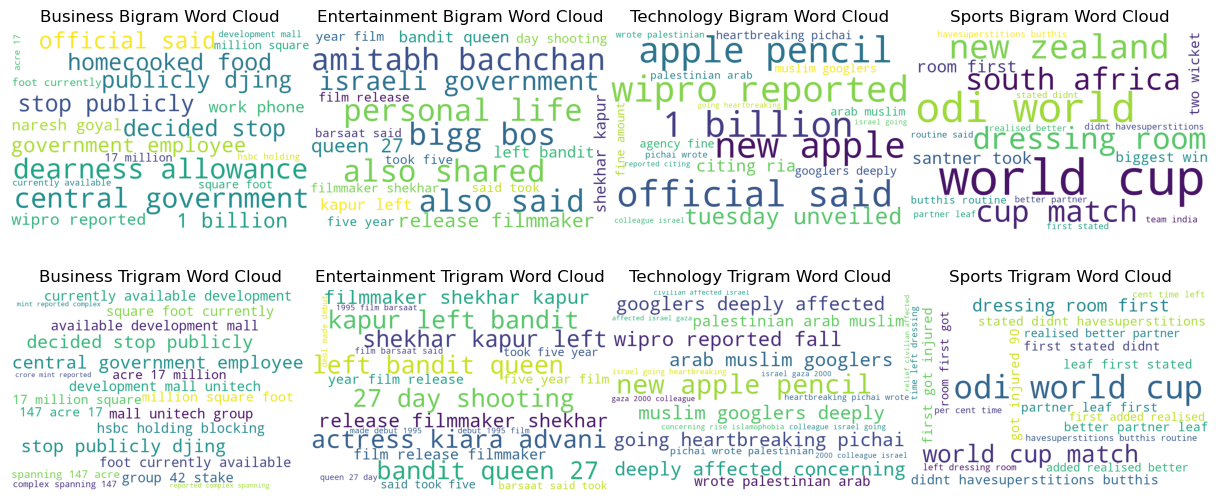

In [201]:
plt.figure(figsize=(12, 8))
axs = [plt.axes([0, .5, .25, .5]), plt.axes([0, 0, .25, .85]), plt.axes([.25, .5, .25, .5]), plt.axes([.25, 0, .25, .85]),
      plt.axes([.5, .5, .25, .5]), plt.axes([.5, 0, .25, .85]), plt.axes([.75, .5, .25, .5]), plt.axes([.75, 0, .25, .85])]

axs[0].imshow(business_img_2)
axs[1].imshow(business_img_3)
axs[2].imshow(entertainment_img_2)
axs[3].imshow(entertainment_img_3)
axs[4].imshow(technology_img_2)
axs[5].imshow(technology_img_3)
axs[6].imshow(sports_img_2)
axs[7].imshow(sports_img_3)

axs[0].set_title('Business Bigram Word Cloud')
axs[1].set_title('Business Trigram Word Cloud')
axs[2].set_title('Entertainment Bigram Word Cloud')
axs[3].set_title('Entertainment Trigram Word Cloud')
axs[4].set_title('Technology Bigram Word Cloud')
axs[5].set_title('Technology Trigram Word Cloud')
axs[6].set_title('Sports Bigram Word Cloud')
axs[7].set_title('Sports Trigram Word Cloud')

for ax in axs: ax.axis('off')
plt.show()

#### Business

In [206]:
top_20_business_bigrams.head(10)

(dearness, allowance)     3
(central, government)     3
(official, said)          2
(homecooked, food)        2
(stop, publicly)          2
(decided, stop)           2
(publicly, djing)         2
(government, employee)    2
(1, billion)              2
(wipro, reported)         2
Name: count, dtype: int64

In [207]:
top_20_business_trigrams.head(10)

(central, government, employee)        2
(stop, publicly, djing)                2
(decided, stop, publicly)              2
(hsbc, holding, blocking)              1
(group, 42, stake)                     1
(mall, unitech, group)                 1
(development, mall, unitech)           1
(available, development, mall)         1
(currently, available, development)    1
(foot, currently, available)           1
Name: count, dtype: int64

#### Entertainment

In [208]:
top_20_entertainment_bigrams.head(10)

(amitabh, bachchan)      2
(also, said)             2
(personal, life)         2
(bigg, bos)              2
(also, shared)           2
(israeli, government)    2
(release, filmmaker)     1
(queen, 27)              1
(bandit, queen)          1
(left, bandit)           1
Name: count, dtype: int64

In [209]:
top_20_entertainment_trigrams.head(10)

(actress, kiara, advani)         1
(27, day, shooting)              1
(bandit, queen, 27)              1
(left, bandit, queen)            1
(kapur, left, bandit)            1
(shekhar, kapur, left)           1
(filmmaker, shekhar, kapur)      1
(release, filmmaker, shekhar)    1
(film, release, filmmaker)       1
(year, film, release)            1
Name: count, dtype: int64

#### Technology

In [210]:
top_20_technology_bigrams.head(10)

(wipro, reported)          2
(official, said)           2
(new, apple)               2
(apple, pencil)            2
(1, billion)               2
(tuesday, unveiled)        2
(citing, ria)              1
(heartbreaking, pichai)    1
(googlers, deeply)         1
(agency, fine)             1
Name: count, dtype: int64

In [211]:
top_20_technology_trigrams.head(10)

(new, apple, pencil)              2
(wipro, reported, fall)           1
(going, heartbreaking, pichai)    1
(deeply, affected, concerning)    1
(googlers, deeply, affected)      1
(muslim, googlers, deeply)        1
(arab, muslim, googlers)          1
(palestinian, arab, muslim)       1
(wrote, palestinian, arab)        1
(pichai, wrote, palestinian)      1
Name: count, dtype: int64

#### Sports

In [212]:
top_20_sports_bigrams.head(10)

(world, cup)        12
(odi, world)         8
(new, zealand)       5
(cup, match)         4
(dressing, room)     4
(south, africa)      4
(santner, took)      2
(room, first)        2
(biggest, win)       2
(two, wicket)        2
Name: count, dtype: int64

In [213]:
top_20_sports_trigrams.head(10)

(odi, world, cup)                      8
(world, cup, match)                    4
(dressing, room, first)                2
(first, got, injured)                  1
(got, injured, 90)                     1
(didnt, havesuperstitions, butthis)    1
(stated, didnt, havesuperstitions)     1
(first, stated, didnt)                 1
(leaf, first, stated)                  1
(partner, leaf, first)                 1
Name: count, dtype: int64